In [14]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using backend: pytorch



	# 1. Generate train and test datasets



/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


0it [00:00, ?it/s]

Generated graphs with   3 nodes are at 100.0% planar in average
Generated graphs with   4 nodes are at 100.0% planar in average
Generated graphs with   5 nodes are at  82.0% planar in average
Generated graphs with   6 nodes are at  76.0% planar in average
Generated graphs with   7 nodes are at  69.0% planar in average
Generated graphs with   8 nodes are at  43.5% planar in average
Generated graphs with   9 nodes are at  36.5% planar in average
Generated graphs with  10 nodes are at  39.0% planar in average
Generated graphs with  11 nodes are at  27.0% planar in average
Generated graphs with  12 nodes are at  27.0% planar in average
Generated graphs with  13 nodes are at  33.0% planar in average
Generated graphs with  14 nodes are at  20.0% planar in average
Generated graphs with  15 nodes are at  15.0% planar in average
Generated graphs are at  43.0% planar in average

	# 2. Train model

Epoch 0, loss 0.2847
Epoch 1, loss 0.1074
Epoch 2, loss 0.0993
Epoch 3, loss 0.0832
Epoch 4, loss 0

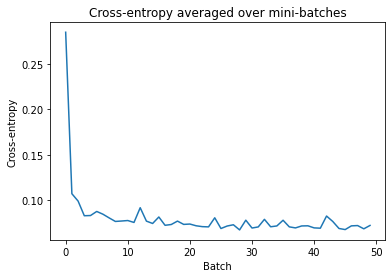

Classifier(
  (conv1): GraphConv(in=1, out=512, normalization=both, activation=None)
  (conv2): GraphConv(in=512, out=512, normalization=both, activation=None)
  (classify): Linear(in_features=512, out_features=2, bias=True)
)

	# 3. Smoke-test model

Skipped

	# 4. Investigate capabilities


	#   - Test set [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] nodes in numbers [500, 500, 500, 500, 500, 500, 500, 500, 300, 300, 300, 300, 300, 150, 150, 150, 100, 100]

Accuracy of sampled predictions on the test set: 95.7236%
Accuracy of argmax predictions on the test set: 97.252033%
[[2539   54]
 [ 115 3442]]
              precision    recall  f1-score   support

  Non-planar       0.96      0.98      0.97      2593
      Planar       0.98      0.97      0.98      3557

    accuracy                           0.97      6150
   macro avg       0.97      0.97      0.97      6150
weighted avg       0.97      0.97      0.97      6150


	### Score: 97.25% (precision for planar: 0

In [2]:
%%time
from qplanarity import test_suite_dgl

generator = 'binomial'
metric = 'f1-score'
test_big=False
test_ramping_max_n = None

train_ns = range(3, 16)
train_nbs = 2 * [50] + 3 * [100] + 3 * [200] + 3 * [200] + 2 * [100]

test_ns = list(range(3, 21))
test_nbs = [500] * 8 + [300] * 5 + [150] * 3 + [100] * 2
all_results = test_suite_dgl(train_ns, train_nbs, generator, seed=1, metric=metric, 
                 test_ns=test_ns, test_nbs=test_nbs, test_smoke=False, test_big=test_big, test_ramping_max_n=test_ramping_max_n,
                return_all=True)

In [3]:
# Update with return_all to see how it scores for each + add histograms on nb trained for each nb od nodes & nb predicts (with 2 colors for planar & not + 2 colors for correct or not)

6150 6150 1800


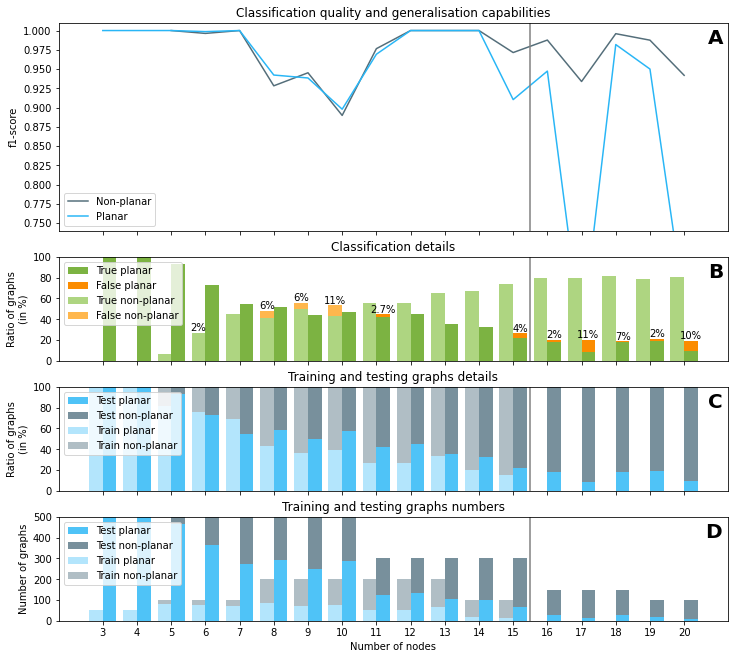

In [19]:
from qplanarity import results_graph
results_graph(all_results, train_nbs, train_ns, test_nbs, test_ns, '3->15=>20', generalization_x=15.5, dgl=True)


	# 1. Generate train and test datasets



0it [00:00, ?it/s]

Generated graphs with   3 nodes are at 100.0% planar in average
Generated graphs with   4 nodes are at 100.0% planar in average
Generated graphs with   5 nodes are at  82.0% planar in average
Generated graphs with   6 nodes are at  76.0% planar in average
Generated graphs with   7 nodes are at  69.0% planar in average
Generated graphs with   8 nodes are at  43.5% planar in average
Generated graphs with   9 nodes are at  36.5% planar in average
Generated graphs with  10 nodes are at  39.0% planar in average
Generated graphs with  11 nodes are at  27.0% planar in average
Generated graphs with  12 nodes are at  27.0% planar in average
Generated graphs with  13 nodes are at  33.0% planar in average
Generated graphs with  14 nodes are at  20.0% planar in average
Generated graphs with  15 nodes are at  15.0% planar in average
Generated graphs are at  43.0% planar in average

	# 2. Train model

Epoch 0, loss 0.2847
Epoch 1, loss 0.1074
Epoch 2, loss 0.0993
Epoch 3, loss 0.0832
Epoch 4, loss 0

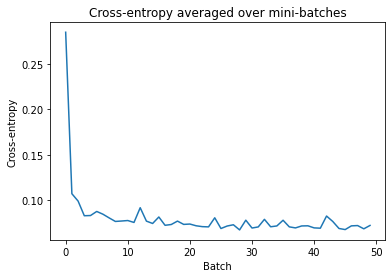

Classifier(
  (conv1): GraphConv(in=1, out=512, normalization=both, activation=None)
  (conv2): GraphConv(in=512, out=512, normalization=both, activation=None)
  (classify): Linear(in_features=512, out_features=2, bias=True)
)

	# 3. Smoke-test model

Skipped

	# 4. Investigate capabilities


	#   - Test set [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] nodes in numbers [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]

Accuracy of sampled predictions on the test set: 96.3393%
Accuracy of argmax predictions on the test set: 97.214286%
[[3662  117]
 [  39 1782]]
              precision    recall  f1-score   support

  Non-planar       0.99      0.97      0.98      3779
      Planar       0.94      0.98      0.96      1821

    accuracy                           0.97      5600
   macro avg       0.96      0.97      0.97      5600
weighted 

In [5]:
test_ns_to100 = list(range(3, 31))
test_nbs_to100 = [200] * len(test_ns_to100)
all_results_to100 = test_suite_dgl(train_ns, train_nbs, generator, seed=1, metric=metric, 
                 test_ns=test_ns_to100, test_nbs=test_nbs_to100, test_smoke=False, test_big=test_big, test_ramping_max_n=test_ramping_max_n,
                return_all=True)

5600 5600 1800


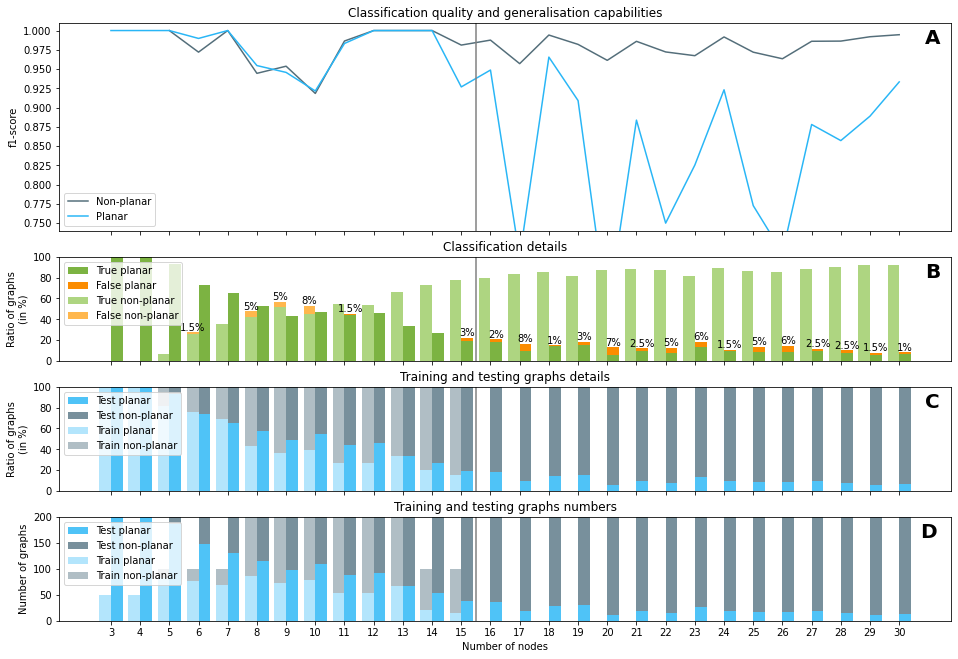

In [20]:
results_graph(all_results_to100, train_nbs, train_ns, test_nbs_to100, test_ns_to100, '3->15=>30', generalization_x=15.5, dgl=True, figsize=(16, 11), loc='left')
